## Exercise #2: Visualizing zooplankton response to 2017 solar eclipse

In this exercise, we will use solar radiation and echo sounder data from the Coastal Endurance Oregon Offshore Surface Mooring in order to visualize the reponse of zooplankton diel vertical migration to the 2017 solar eclipse. For some fun reading, see this LA Times article, ["Poor little zooplankton – they got totally punk’d by Monday’s eclipse"](https://www.latimes.com/science/sciencenow/la-sci-sn-eclipse-science-results-20180823-story.html) and this [Sherman and Honey, 1970 study](https://www.nature.com/articles/2271156a0) looking at the same phenomenon. This exercise will provide practice:
- Importing CSV and NetCDF files
- Using *pandas* and *xarray* to work with imported data
- Plotting data with *matplotlib*

This tutorial was adapted from [OOI Data Labs Education Nuggets](https://datalab.marine.rutgers.edu) and Lori Garzio (Rutgers University)


In [39]:
# Packages required for data processing and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import xarray as xr

### 1. Import irradiance data

We will start by importing the csv with shortwave irradiance from the Coastal Endurance Oregon Offshore Surface Mooring (CE04OSSM) for the time of/around the eclipse (08/21/2017 to 08/22/2017):

In [40]:
# Use the pandas read_csv function to import the data from the csv file
irrad = pd.read_csv('E04_CE04OSSM_METBK_eclipse.csv',header=0)

# print the data type of the 'irrad' variable
print(type(irrad))

# Print the data
print(irrad)

<class 'pandas.core.frame.DataFrame'>
                               time  Downwelling Shortwave Irradiance (W m-2)
0     2017-08-21 00:00:03.796999680                                     518.2
1     2017-08-21 00:01:08.644000256                                     482.0
2     2017-08-21 00:02:12.951000064                                     473.8
3     2017-08-21 00:03:17.189000192                                     466.5
4     2017-08-21 00:04:22.203999744                                     486.7
...                             ...                                       ...
2155  2017-08-22 11:55:11.407000064                                       3.1
2156  2017-08-22 11:56:15.644000256                                       3.2
2157  2017-08-22 11:57:19.942000128                                       3.2
2158  2017-08-22 11:57:53.422000128                                       3.2
2159  2017-08-22 11:58:57.651999744                                       3.2

[2160 rows x 2 columns]


Let's review a few ways to view the contents of a dataframe.  We can examine the first few rows using the `head()` function:

In [ ]:
# Print out the first few lines of the irradiance dataset using df.head()
irrad.head()

Or last few rows using the `tail()` function:

In [ ]:
# Print out the last few lines of the irradiance dataset using df.tail()
irrad.tail()

The `describe()` function provides statistical information on each column of the dataframe with an appropriate type:

In [ ]:
# Use df.describe()
irrad.describe()

The `info()` function provides a description of the rows, columns, and datatypes in our dataframe:

In [ ]:
# Use df.info()
irrad.info()

This tells us about the length and types of data stored in our dataframe. We can see the number of rows for all columns, as well as the number of columns in the dataframe. We can also see the specific datatype of values for each respective column. For example, the values in `Downwelling Shortwave Irradiance (W m-2)` are all floats, and the values in `time` are objects (an object are an instance of a [class](https://docs.python.org/3/tutorial/classes.html#instance-objects)).

However, we want the `time` column to be of type *datatime*:

In [41]:
# Convert datatype of time column to 'datetime64[ns]'
irrad = irrad.astype({"time": 'datetime64[ns]'})

# Print new datatype
irrad.dtypes

time                                        datetime64[ns]
Downwelling Shortwave Irradiance (W m-2)           float64
dtype: object

You've now successfully imported data into Python! Pandas mostly supports .csv and Excel files, but other libraries can similarly be used to import .txt, .netcdf, and other data file types. Numpy has great support for reading .txt files into arrays and Xarray is good for reading NetCDFs.

It's important to know that many datasets will not input as cleanly as this csv. You may need to manipulate or clean up the dataframes. Luckily, Pandas (like many other major Python libraries) has great documentation to guide you through any problems!

### 2. Plot irradiance data
Let's make a quick plot of the solar irradiance data on the day of the eclipse:

Text(0, 0.5, 'Downwelling Shortwave Irradiance ($W/m^2$)')

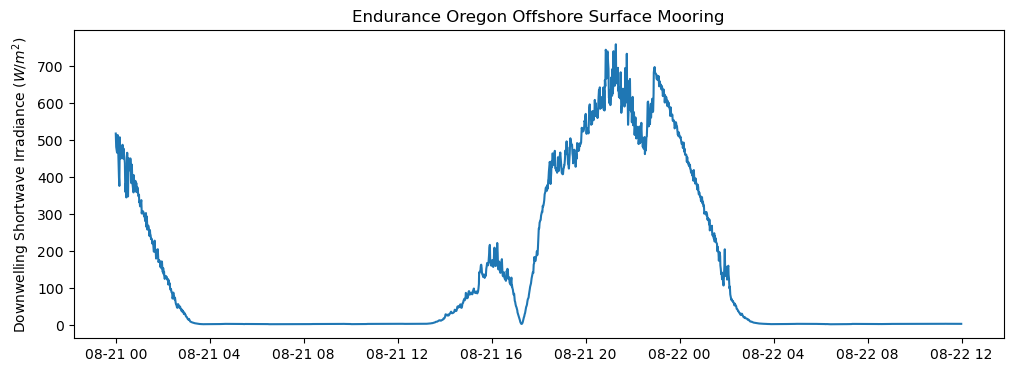

In [4]:
# Plot irradiance
fig = plt.figure(figsize=(12, 4))
plt.plot(irrad['time'], irrad['Downwelling Shortwave Irradiance (W m-2)'])

# Add labels
plt.title('Endurance Oregon Offshore Surface Mooring')
plt.ylabel('Downwelling Shortwave Irradiance ($W/m^2$)')

Great! Note that all of the timestamps for OOI data are in UTC. We can see the solar radiation start to increase the morning of Aug 21, then around 17:00 UTC the solar radiation drops down to zero right when the eclipse happens. The mooring is located in Pacific Daylight Time (7 hours behind UTC) so this data shows that the eclipse occurred somewhere around 10:00 AM PDT.

### 3. Import echo sounder data

We are now going to download the echo sounder data from the Endurance Array Oregon Offshore Cabled Shallow Profiler Mooring (CE04OSPS). This will provide practice working with NetCDF files. The 'NetCDF_files' folder contains many files in order to get data for the entire desired time range. However, let's start by looking at a single file to get familiar with these NetCDFs:

In [5]:
# Read NetCDF file ('OOI-D20170821-T000000_MVBS.nc')
file = xr.open_dataset('NetCDF_files/OOI-D20170821-T000000_MVBS.nc')

# Look at structure/contents of file
file
print(file)

<xarray.Dataset> Size: 3MB
Dimensions:              (frequency: 3, ping_time: 593, range_bin: 215)
Coordinates:
  * frequency            (frequency) float32 12B 1.2e+05 3.8e+04 2e+05
  * ping_time            (ping_time) datetime64[ns] 5kB 2017-08-21T00:00:05.4...
  * range_bin            (range_bin) int64 2kB 0 1 2 3 4 ... 210 211 212 213 214
Data variables:
    MVBS                 (frequency, ping_time, range_bin) float64 3MB ...
    MVBS_range_bin_size  (frequency) float64 24B ...
Attributes:
    MVBS_ping_size:  10

So you can now see what's in the file, but what does this data actually mean? MVBS is the mean volume backscattering strength from the echo sounder. The data has a resolution of roughly 10 second averages in 1 m depth bins. The coordinates are the frequency (Hz) of the echo sounder, the ping time (datetime) of measurement, and range_bin (which is inversely related to depth).

Let's start by merging the NetCDF files into a single dataset that we can manipulate:

In [12]:
# Open all of the MVBS.nc files as one dataset
mvbs_data = xr.open_mfdataset('NetCDF_files/*MVBS.nc', 
                              combine='by_coords', data_vars='different')

# Add depth as a new coordinate
depth = mvbs_data.range_bin * mvbs_data.MVBS_range_bin_size
mvbs_data.coords['depth'] = (['range_bin', 'frequency'], depth.data[::-1])
print(mvbs_data)

<xarray.Dataset> Size: 69MB
Dimensions:              (frequency: 3, ping_time: 13333, range_bin: 215)
Coordinates:
  * frequency            (frequency) float32 12B 1.2e+05 3.8e+04 2e+05
  * ping_time            (ping_time) datetime64[ns] 107kB 2017-08-21T00:00:05...
  * range_bin            (range_bin) int64 2kB 0 1 2 3 4 ... 210 211 212 213 214
    depth                (range_bin, frequency) float64 5kB dask.array<chunksize=(215, 3), meta=np.ndarray>
Data variables:
    MVBS                 (frequency, ping_time, range_bin) float64 69MB dask.array<chunksize=(3, 593, 215), meta=np.ndarray>
    MVBS_range_bin_size  (frequency) float64 24B dask.array<chunksize=(3,), meta=np.ndarray>
Attributes:
    MVBS_ping_size:  10


In [13]:
# Look at part of the depth variable
mvbs_data.depth.values[0:20]

array([[204.6030087 , 204.6030087 , 204.6030087 ],
       [203.64691988, 203.64691988, 203.64691988],
       [202.69083105, 202.69083105, 202.69083105],
       [201.73474223, 201.73474223, 201.73474223],
       [200.7786534 , 200.7786534 , 200.7786534 ],
       [199.82256457, 199.82256457, 199.82256457],
       [198.86647575, 198.86647575, 198.86647575],
       [197.91038692, 197.91038692, 197.91038692],
       [196.9542981 , 196.9542981 , 196.9542981 ],
       [195.99820927, 195.99820927, 195.99820927],
       [195.04212045, 195.04212045, 195.04212045],
       [194.08603162, 194.08603162, 194.08603162],
       [193.12994279, 193.12994279, 193.12994279],
       [192.17385397, 192.17385397, 192.17385397],
       [191.21776514, 191.21776514, 191.21776514],
       [190.26167632, 190.26167632, 190.26167632],
       [189.30558749, 189.30558749, 189.30558749],
       [188.34949867, 188.34949867, 188.34949867],
       [187.39340984, 187.39340984, 187.39340984],
       [186.43732101, 186.43732

In [14]:
# Look at the timestamps
mvbs_data.ping_time.values

array(['2017-08-21T00:00:05.473800038', '2017-08-21T00:00:15.604499968',
       '2017-08-21T00:00:25.634599987', ...,
       '2017-08-22T13:11:58.472300134', '2017-08-22T13:12:08.502100070',
       '2017-08-22T13:12:15.021999786'], dtype='datetime64[ns]')

In [15]:
# Look at the frequencies
mvbs_data.frequency

<xarray.DataArray 'frequency' (frequency: 3)> Size: 12B
array([120000.,  38000., 200000.], dtype=float32)
Coordinates:
  * frequency  (frequency) float32 12B 1.2e+05 3.8e+04 2e+05
Attributes:
    units:      Hz
    valid_min:  0.0

This echo sounder collects data at three frequencies: 38 kHz, 120 kHz, and 200 kHz. In general, higher frequencies detect smaller organisms. For example, the 38 kHz frequency could detect fish while 120 kHz could give an idea of the amount of larger zooplankton (such as krill) and 200 kHz can detect smaller zooplankton such as copepods. There can be some overlap between the types of organisms that are detected at different frequencies (e.g. krill can be detected at 120 and 200 kHz), and an organism's acoustic signature varies with other factors such as body composition and orientation in the water column. The only way to really determine what species are detected by an echosounder at any time is by ground-truthing the backscatter measurements with zooplankton and fish collected at that location with net tows.

For this example, we'll grab the data collected at 200 kHz. This will generally give us an idea about the abundance and distribution of smaller zooplankton. We need to make sure to grab only the data within our requested time range so that it will match up with the solar radiation data. While the NetCDF files were selected based on time, the last file will contain data beyond the requested timestamp.

In [22]:
# Get the data at 200 kHz at the specified time
MVBS_200k = mvbs_data.MVBS.sel(frequency=200000).sel(ping_time=slice('2017-08-21 00:00:00', 
                                                                     '2017-08-22 12:00:00'))
print(MVBS_200k)

# Swap 'range_bin' and 'depth' so that 'depth' is a dimension coordinate (marked by *)
# Dimension coordinates can be used for label based indexing, which will be useful for plotting
MVBS_200k = MVBS_200k.swap_dims({'range_bin': 'depth'})
print(MVBS_200k)

<xarray.DataArray 'MVBS' (ping_time: 12900, range_bin: 215)> Size: 22MB
dask.array<getitem, shape=(12900, 215), dtype=float64, chunksize=(593, 215), chunktype=numpy.ndarray>
Coordinates:
    frequency  float32 4B 2e+05
  * ping_time  (ping_time) datetime64[ns] 103kB 2017-08-21T00:00:05.473800038...
  * range_bin  (range_bin) int64 2kB 0 1 2 3 4 5 6 ... 209 210 211 212 213 214
    depth      (range_bin) float64 2kB dask.array<chunksize=(215,), meta=np.ndarray>
<xarray.DataArray 'MVBS' (ping_time: 12900, depth: 215)> Size: 22MB
dask.array<getitem, shape=(12900, 215), dtype=float64, chunksize=(593, 215), chunktype=numpy.ndarray>
Coordinates:
    frequency  float32 4B 2e+05
  * ping_time  (ping_time) datetime64[ns] 103kB 2017-08-21T00:00:05.473800038...
    range_bin  (depth) int64 2kB 0 1 2 3 4 5 6 7 ... 208 209 210 211 212 213 214
  * depth      (depth) float64 2kB 204.6 203.6 202.7 201.7 ... 1.912 0.9561 0.0


array([[-43.41482269, -43.34641227, -43.34526456, ..., -43.24885044,
        -43.25473236, -43.24281359],
       [-52.61988268, -52.06334231, -52.11766003, ..., -51.47966226,
        -51.5220746 , -51.4746228 ],
       [-71.4846638 , -70.81505602, -70.90981075, ..., -69.69292126,
        -69.74549328, -69.48202844],
       ...,
       [-55.12229248, -54.10032531, -55.23257774, ..., -52.66865975,
        -51.38588009, -51.98861272],
       [-55.79904569, -54.71189797, -54.84353768, ..., -52.43298564,
        -53.34879791, -54.09373508],
       [-53.67819082, -53.87178631, -54.92831086, ..., -54.1591067 ,
        -51.55401886, -51.94814244]])

Now let's plot the MVBS data as a cross-section, where the x-axis = time and the y-axis = depth:

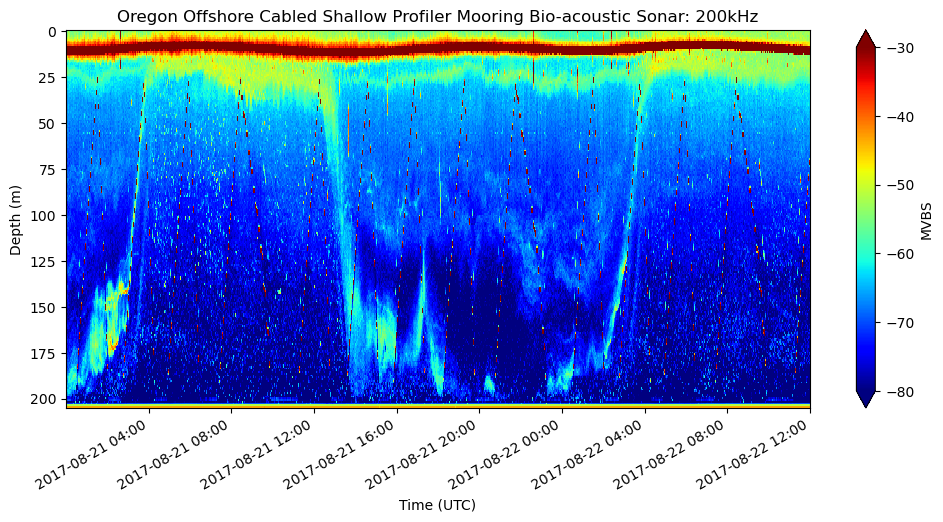

In [28]:
# Plot MVBS data (use ".T" to transpose values)
fig, ax = plt.subplots(figsize=(12, 6))
h = ax.pcolormesh(MVBS_200k.ping_time.values, MVBS_200k.depth.values, MVBS_200k.values.T, 
                  vmin=-80, vmax=-30, cmap='jet')

# Add color bar
cb = plt.colorbar(h, extend='both')
cb.set_label(label='MVBS')

# Add labels
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Time (UTC)')
ax.set_title('Oregon Offshore Cabled Shallow Profiler Mooring Bio-acoustic Sonar: 200kHz')

# Invert y-axis
ax.invert_yaxis()

# Optional: Format the date axis
df = mdates.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_formatter(df)
fig.autofmt_xdate()
plt.subplots_adjust(bottom=0.25)

First, notice the noise at the surface (which also demonstrates the tidal signal) and the zooplankton ascending and descending in the water column (the green colors). One other thing to note is the profiler on the mooring which is the dotted dark red line that is moving up and down in the water column several times a day. Now, let's add the irradiance data to see the correlation between solar radiation and zooplankton!

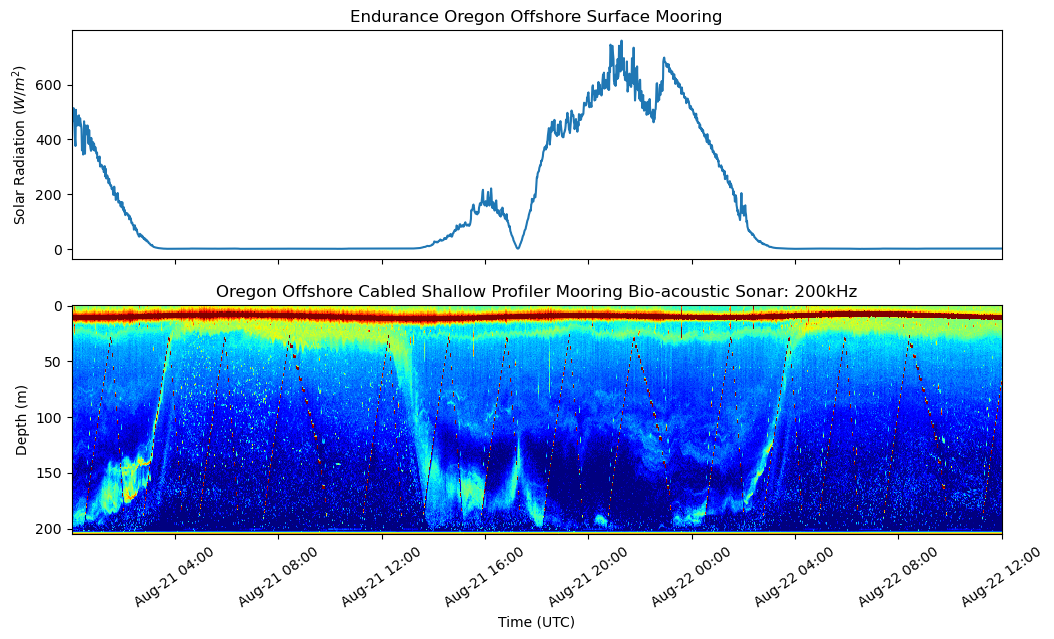

In [38]:
# Set up figure
fig, ax = plt.subplots(2,1,figsize=(12, 8))

# Plot solar radiation data
ax[0].plot(irrad['time'], irrad['Downwelling Shortwave Irradiance (W m-2)'])
ax[0].set_title('Endurance Oregon Offshore Surface Mooring')
ax[0].set_ylabel('Solar Radiation ($W/m^2$)')
plt.setp(ax[0].get_xticklabels(), visible=False)

# Set the x limits to the min and max timestamp to get rid of extra white space in the graph
ax[0].set_xlim([np.nanmin(irrad['time']), np.nanmax(irrad['time'])])

# Plot echosounder data
h = ax[1].pcolormesh(MVBS_200k.ping_time.values, MVBS_200k.depth.values, MVBS_200k.T, 
                   vmin=-80, vmax=-30, cmap='jet')

# Add labels
ax[1].set_ylabel('Depth (m)')
ax[1].set_xlabel('Time (UTC)')
ax[1].set_title('Oregon Offshore Cabled Shallow Profiler Mooring Bio-acoustic Sonar: 200kHz')

# Invert y-axis
ax[1].invert_yaxis()

# Optional: Format the date axis
df = mdates.DateFormatter('%b-%d %H:%M')
ax[1].xaxis.set_major_formatter(df)
plt.xticks(rotation=35)
plt.subplots_adjust(bottom=0.25)

# Save the figure to your local machine
# If want to save in folder other than current location, add path to figname (e.g. '\Users\zoeaarons\Desktop' if want to save on desktop)
figname = 'zooplankton_eclipse.png' 
plt.savefig(figname, dpi=200)

Here we can visualize the vertical migration of zooplankton as it relates to solar radiation - the zooplankton are at depth during the day and migrate to the surface at night. As the solar radiation increases on Aug 21, they descend back to deeper waters. Then, right when the eclipse happens around 17:00 UTC, the zooplankton are tricked into thinking it's dusk and briefly start to ascend again until the eclipse passes and they go back down to depth where they remain for the rest of the daylight hours!